

# Shubham Santosh Bagade

# Task 2: Prediction using Unsupervised ML


# GRIPFEB21

# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


# Data Source: https://bit.ly/3kXTdox

# Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Iris.csv')

# Visualization the data

In this setp we will try to visualize our dataset

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
df.shape

(150, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
# now we will drop the label column because it is an unsupervised learning problem 
df1 = pd.DataFrame(df)
df1 = df.drop(columns= ['Species' ,'Id'] )
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


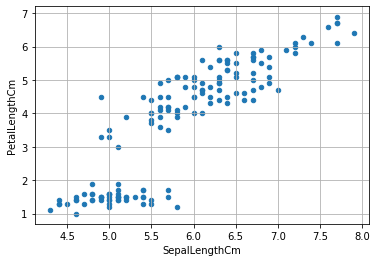

In [22]:
df.plot(kind ="scatter", 
          x ='SepalLengthCm', 
          y ='PetalLengthCm') 
plt.grid()

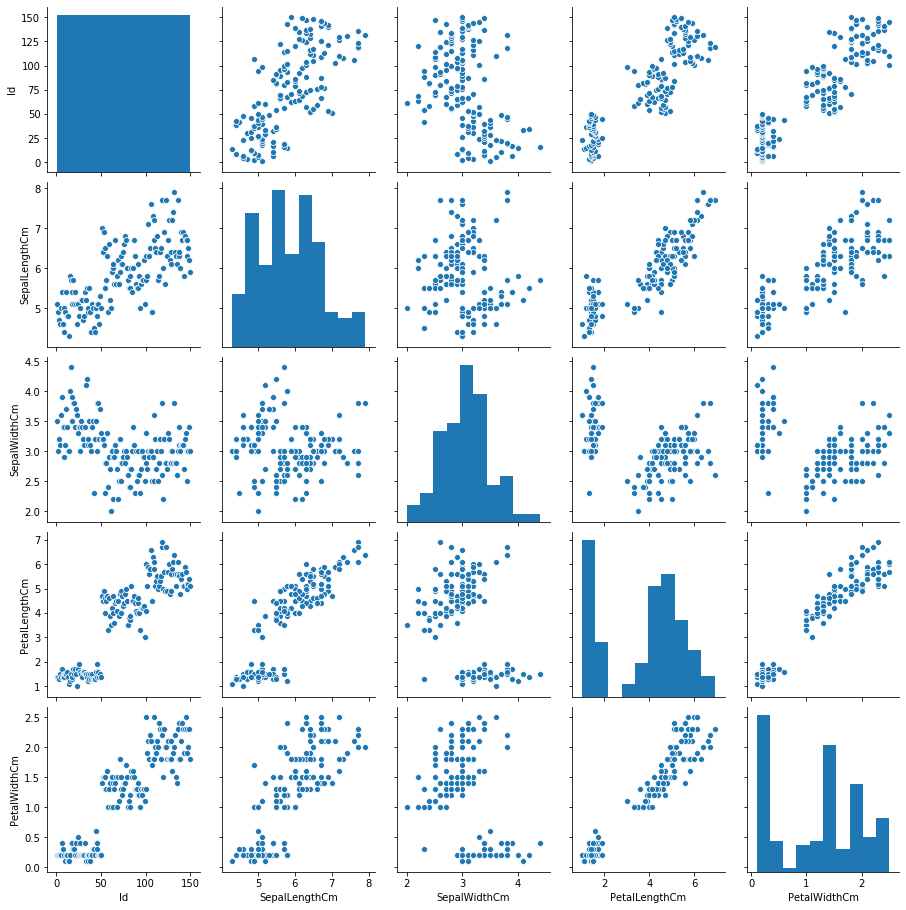

In [47]:
sns.pairplot(df)

# Finding the optimum number of clusters

# Elbow method

In [31]:
x= df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

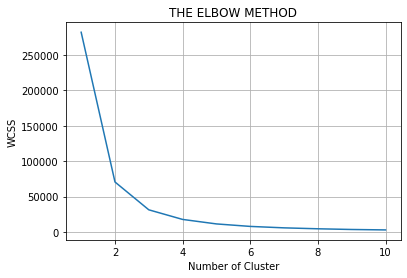

In [45]:
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Applying k means clustering on the data

Choose the number of clusters as 3

In [39]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred = km.fit_predict(df1)

# Visualising the clusters

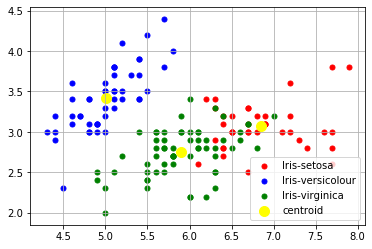

In [44]:
x = df1.iloc[:,[0,1,2,3]].values
plt.scatter(x[pred==0,0],x[pred==0,1],s=25,c='red',label='Iris-setosa')
plt.scatter(x[pred==1,0],x[pred==1,1],s=25,c='blue',label='Iris-versicolour')
plt.scatter(x[pred==2,0],x[pred==2,1],s=25,c='green',label='Iris-virginica')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=100 ,c='yellow', label='centroid')
plt.legend()
plt.grid()
plt.show()


# Thank you